In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
def unpackSIFTOctave(kpt):
    """unpackSIFTOctave(kpt)->(octave,layer,scale)
    @created by Silencer at 2018.01.23 11:12:30 CST
    @brief Unpack Sift Keypoint by Silencer
    @param kpt: cv2.KeyPoint (of SIFT)
    """
    _octave = kpt.octave
    octave = _octave & 0xFF
    layer = (_octave >> 8) & 0xFF
    if octave >= 128:
        octave |= -128
    if octave >= 0:
        scale = float(1 / (1 << octave))
    else:
        scale = float(1 << -octave)
    return octave, layer, scale

In [ ]:
dirpath = './images/'

## 이미지 읽고 Gray Scale로 변환

img1 = cv2.imread(dirpath + 'book1.png')
img2 = cv2.imread(dirpath + 'book2.png')

grayimg1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
grayimg2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

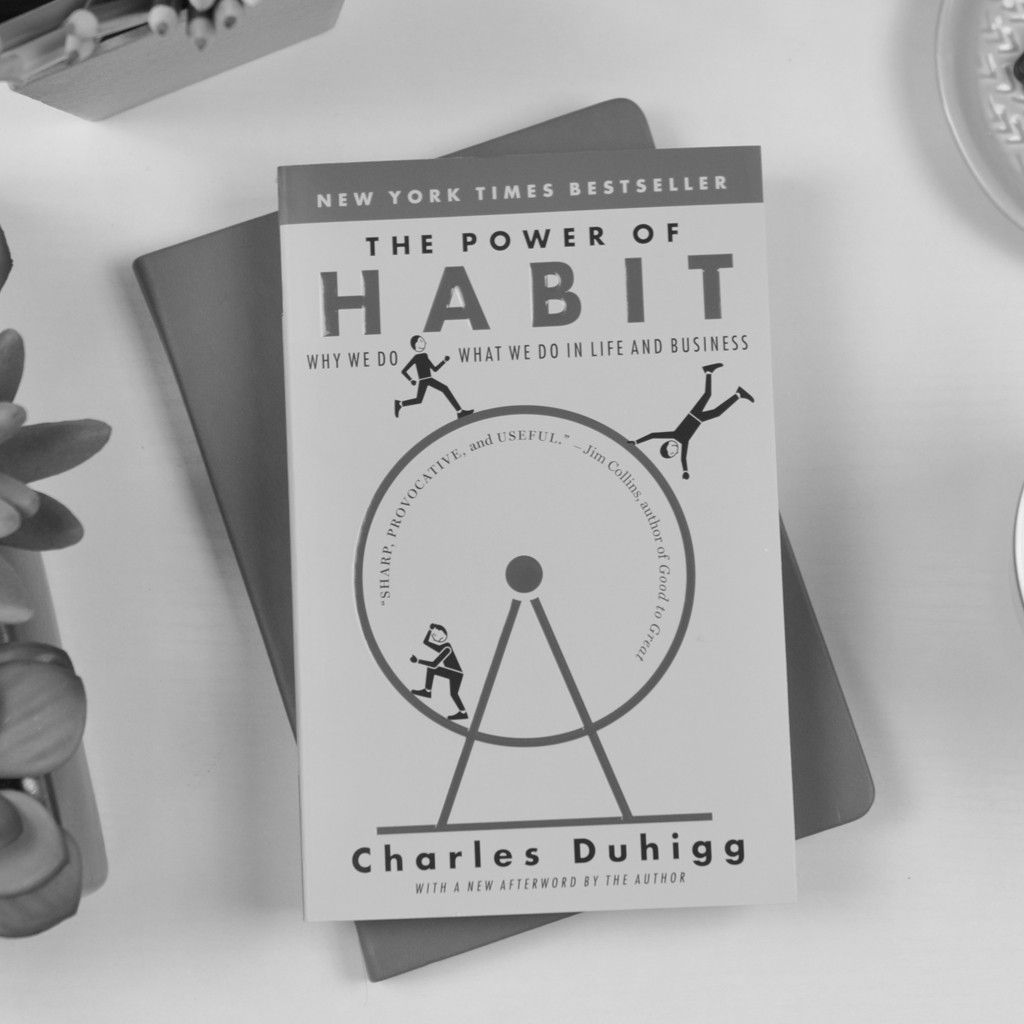

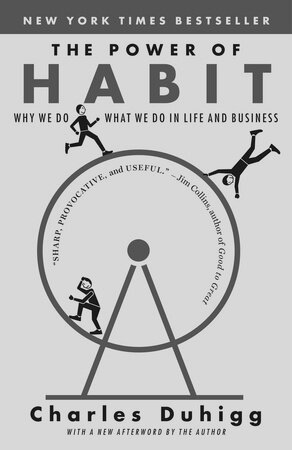

In [ ]:
cv2_imshow(grayimg1)
cv2_imshow(grayimg2)

In [ ]:
## SIFT
sift = cv2.SIFT_create()

## keypoints와 descriptor 저장
keypoints1, descriptor1 = sift.detectAndCompute(grayimg1, None)
keypoints2, descriptor2 = sift.detectAndCompute(grayimg2, None)

In [ ]:
idx = 1255
octave, layer, scale = unpackSIFTOctave(keypoints1[idx])
print("Octave:{}, Layer: {}, Scale: {}".format(octave, layer, scale))

Octave:0, Layer: 2, Scale: 1.0


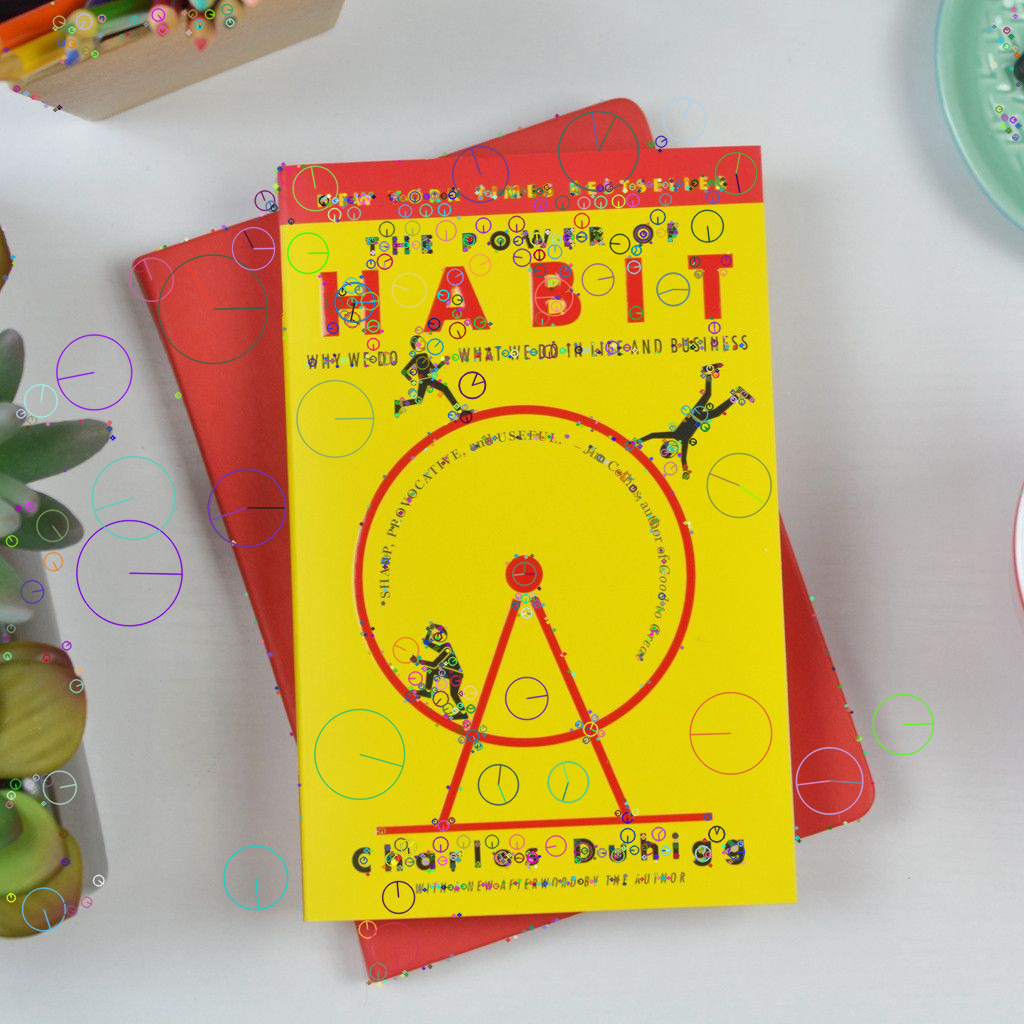

In [ ]:
result1 = cv2.drawKeypoints(img1, keypoints1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2_imshow(result1)

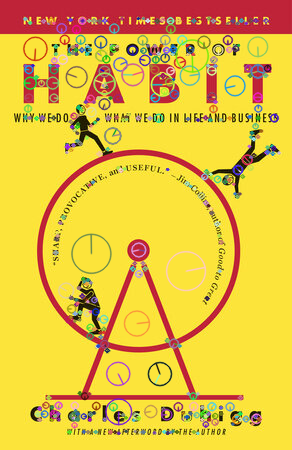

In [ ]:
result2 = cv2.drawKeypoints(img2, keypoints2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2_imshow(result2)

In [ ]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptor1, descriptor2)

In [ ]:
matches = sorted(matches, key=lambda x:x.distance)
matched_img = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:50], None, flags=2)

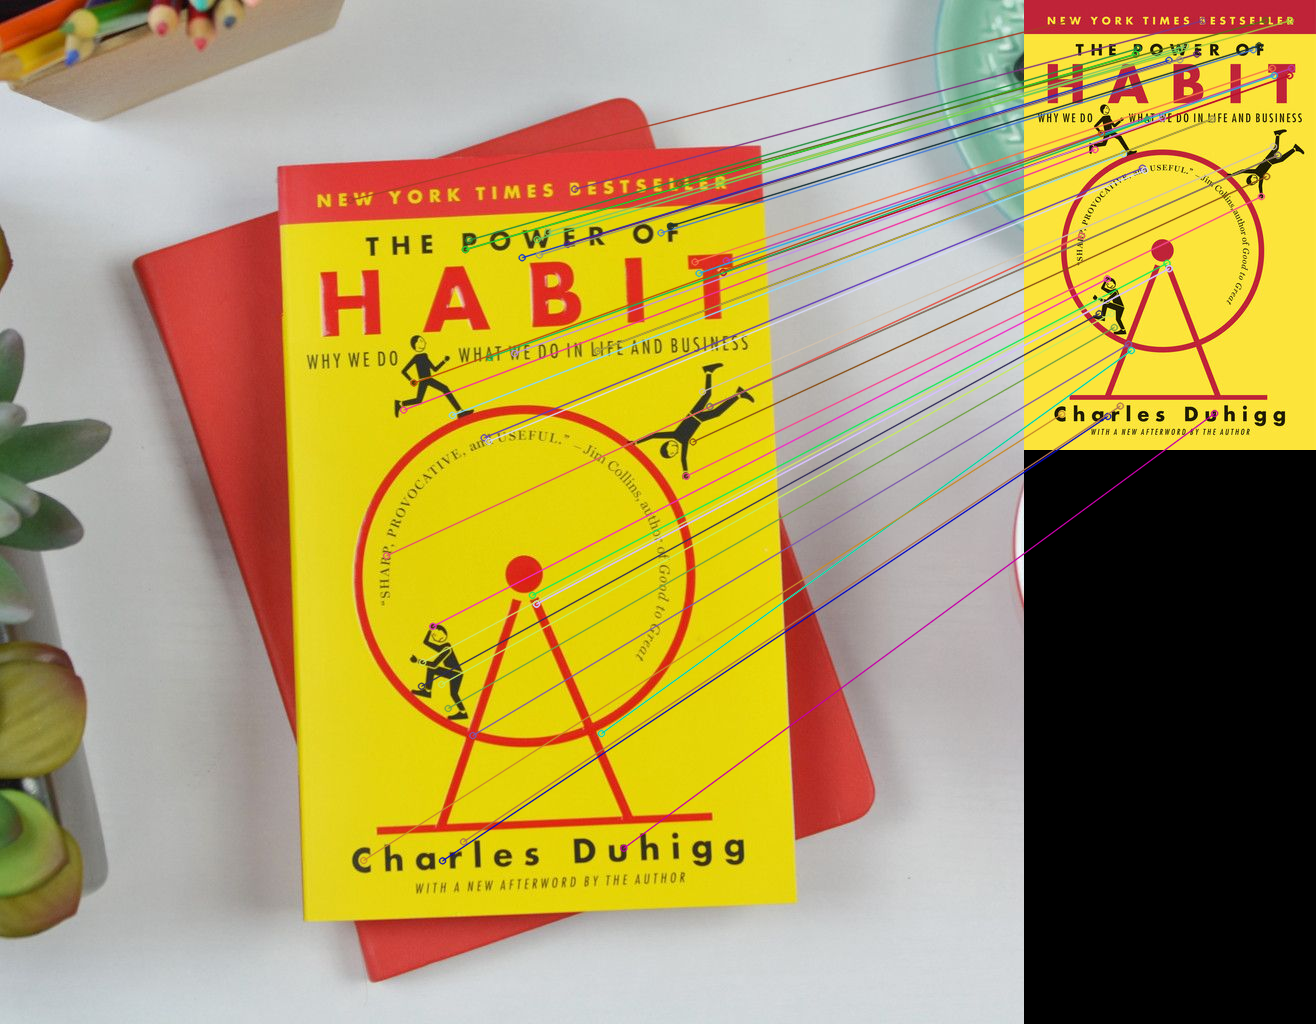

In [ ]:
cv2_imshow(matched_img)

# 과제 07

(512, 512, 3)


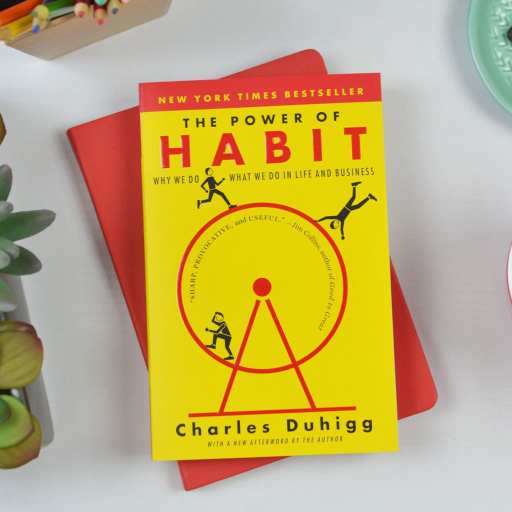

In [ ]:
resize_img1 = cv2.resize(img1, (0,0), fx=0.5, fy=0.5)
print(resize_img1.shape)
cv2_imshow(resize_img1)

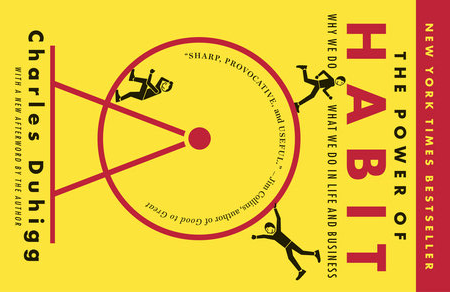

In [ ]:
rotate_img2 = cv2.rotate(img2, cv2.ROTATE_90_CLOCKWISE)
cv2_imshow(rotate_img2)

In [ ]:
grayimg1 = cv2.cvtColor(resize_img1, cv2.COLOR_BGR2GRAY)
grayimg2 = cv2.cvtColor(rotate_img2, cv2.COLOR_BGR2GRAY)

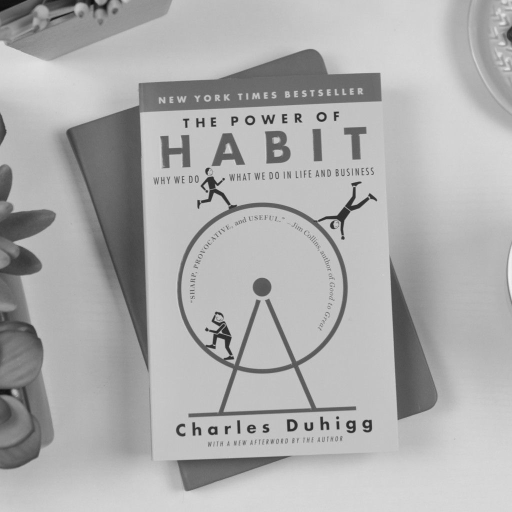

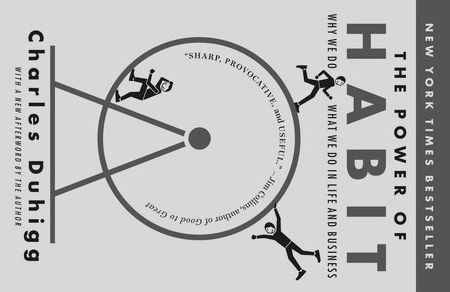

In [ ]:
cv2_imshow(grayimg1)
cv2_imshow(grayimg2)

In [ ]:
## SIFT
sift = cv2.SIFT_create()

## keypoints와 descriptor 저장
keypoints1, descriptor1 = sift.detectAndCompute(grayimg1, None)
keypoints2, descriptor2 = sift.detectAndCompute(grayimg2, None)

In [ ]:
idx = 500
octave, layer, scale = unpackSIFTOctave(keypoints1[idx])
print("Octave:{}, Layer: {}, Scale: {}".format(octave, layer, scale))

Octave:-1, Layer: 3, Scale: 2.0


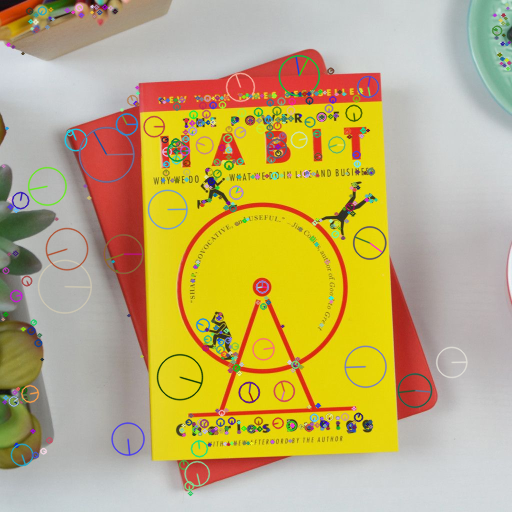

In [ ]:
result1 = cv2.drawKeypoints(resize_img1, keypoints1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2_imshow(result1)

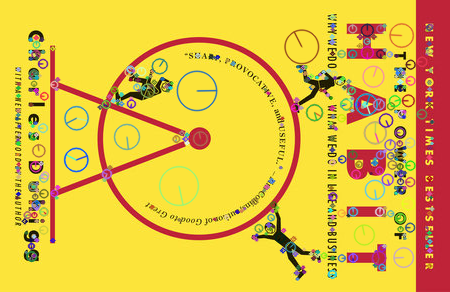

In [ ]:
result2 = cv2.drawKeypoints(rotate_img2, keypoints2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2_imshow(result2)

In [ ]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptor1, descriptor2)

In [ ]:
matches = sorted(matches, key=lambda x:x.distance)
matched_img = cv2.drawMatches(resize_img1, keypoints1, rotate_img2, keypoints2, matches[:30], None, flags=2)

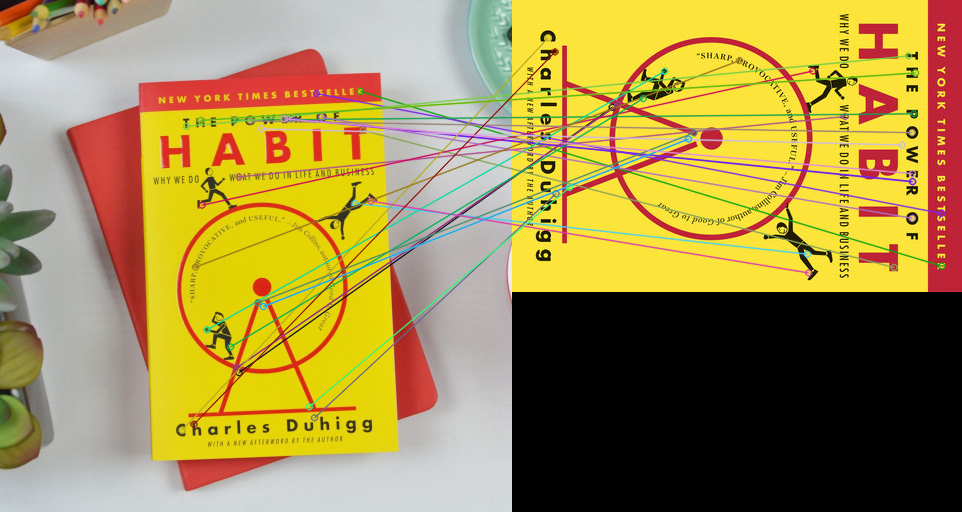

In [ ]:
cv2_imshow(matched_img)

In [ ]:
!jupyter nbconvert --to html Lab07_SHIFT.ipynb

[NbConvertApp] Converting notebook Lab07_SHIFT.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 12 image(s).
[NbConvertApp] Writing 6527947 bytes to Lab07_SHIFT.html
